In [ ]:
%pip install kagglehub
%pip install kaggle
%pip install snorkel
%pip install matlplotlib
%pip install textblob


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [3]:
%pip install --upgrade openpyxl
import openpyxl
print(openpyxl.__version__)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


3.1.5


Importação das bibliotecas

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



Carregamento do dataset

In [ ]:
from kagglehub import KaggleDatasetAdapter

# Carregar o dataset (supondo que já tenha sido carregado corretamente)
file_path_2 = "tweet_sentiment.csv"  # Ajuste conforme o nome correto do arquivo

# Carregar o dataset usando o KaggleHub (alternativa à leitura direta com pandas)
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sahideseker/tweet-sentiment-classification-dataset",
  file_path_2,
)

# Exibir as primeiras 5 linhas para inspecionar os dados
print("Primeiros 5 registros:", df.head())



C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22460\2236694325.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeiros 5 registros:                            tweet sentiment
0      The event starts at 5 PM.   neutral
1    I hate how this turned out.  negative
2          Fantastic experience!  positive
3          Fantastic experience!  positive
4  This is the worst thing ever!  negative


Distribuição dos sentimentos dos tweets

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22460\3847719490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


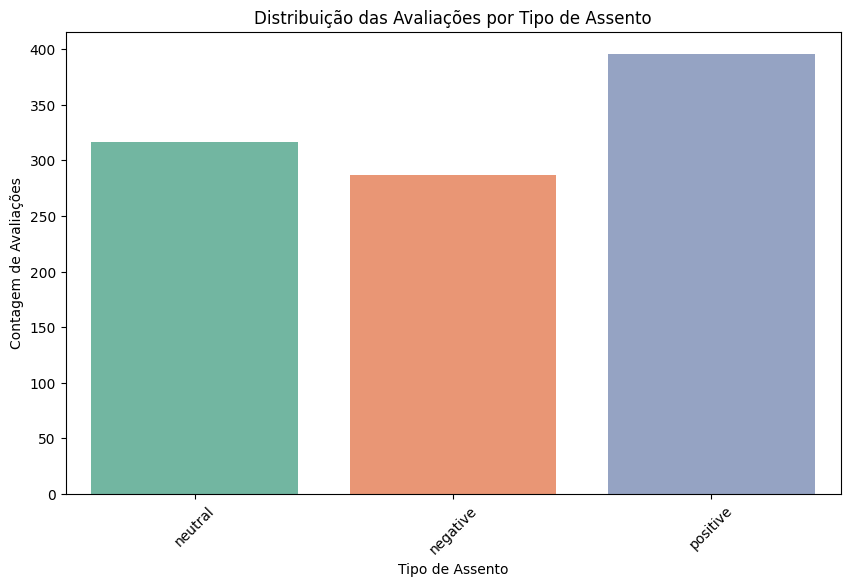

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribuição dos Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


Comprimento dos tweets

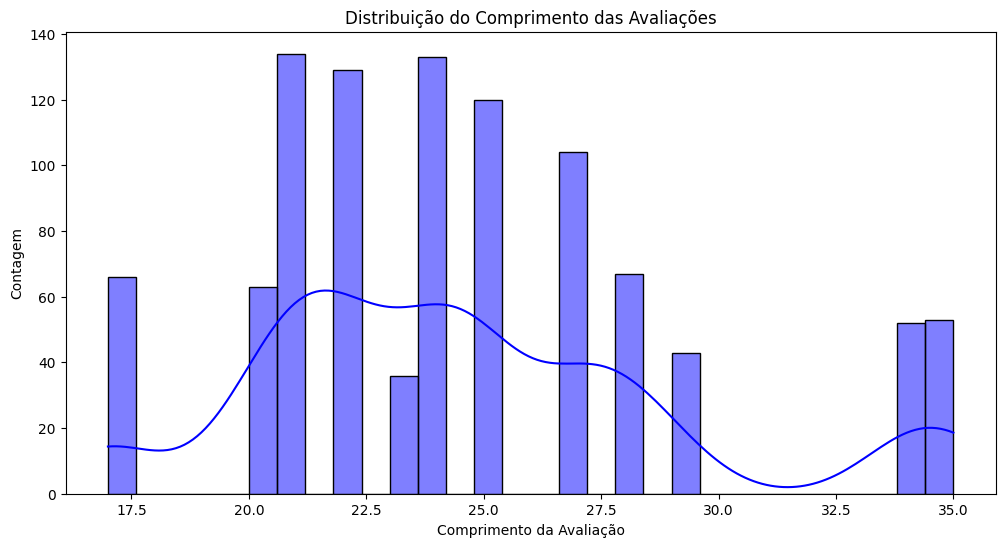

In [ ]:
# Criando uma nova coluna para o comprimento de cada avaliação
df['tweet Length'] = df['tweet'].apply(len)

# Plotando a distribuição do comprimento das avaliações
plt.figure(figsize=(12, 6))
sns.histplot(df['tweet Length'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Comprimento dos Tweets')
plt.xlabel('Comprimento dos Tweets')
plt.ylabel('Contagem')
plt.show()


Palavras mais usadas

[nltk_data] Downloading package stopwords to C:\Users\Alan de
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22460\902572958.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_common, palette="viridis")


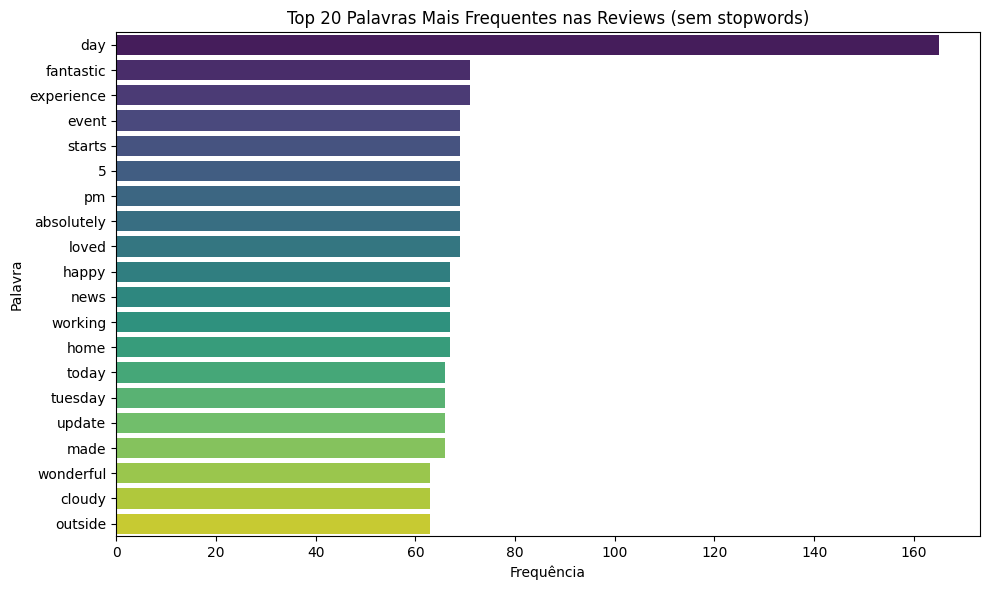

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from collections import Counter

# Definir stopwords em inglês
stop_words = set(stopwords.words('english'))

# 1) Tokenização simples e remoção de stopwords
df["tokens"] = (
    df["tweet"]
    .str.lower()
    .str.findall(r"\b\w+\b")
    .apply(lambda tokens: [w for w in tokens if w not in stop_words])
)

# 2) Contar todas as palavras filtradas
all_words = [w for tokens in df["tokens"] for w in tokens]
word_counts = Counter(all_words)

# 3) Selecionar as top 20 palavras mais frequentes
top_n = 20
common = word_counts.most_common(top_n)
df_common = pd.DataFrame(common, columns=["word", "count"])

# 4) Plot das top 20 palavras
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=df_common, palette="viridis")
plt.title(f"Top {top_n} Palavras Mais Frequentes nas Reviews (sem stopwords)")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.tight_layout()
plt.show()


Uso de Emois e Tags HTML

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22460\428022596.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="count", data=prop_df, ax=axes[0], palette="pastel")
C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_22460\428022596.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="prop", data=prop_df, ax=axes[1], palette="pastel")


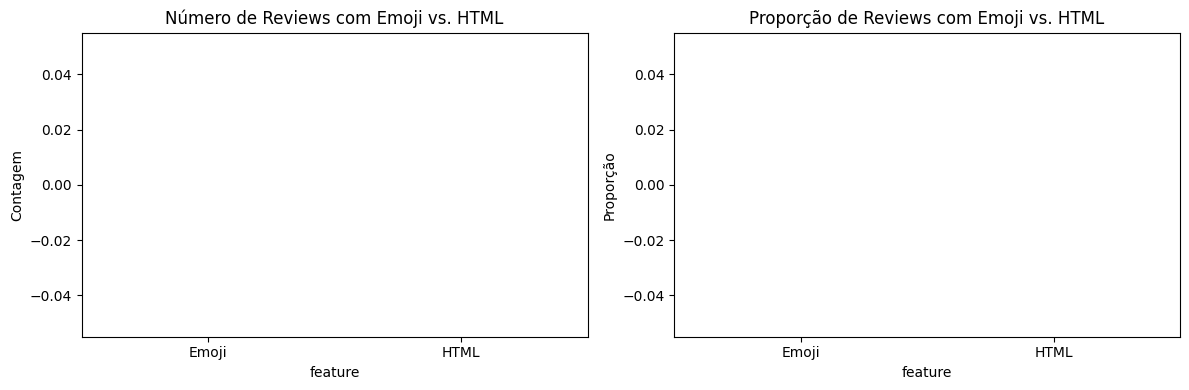

In [ ]:
# === Detecção de Emojis e Tags HTML ===
# Regex para blocos Unicode típicos de emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
    u"\U0001F680-\U0001F6FF"  # transporte e mapas
    u"\U0001F1E0-\U0001F1FF"  # bandeiras
    "]+",
    flags=re.UNICODE,
)

# Regex para detectar tags HTML
html_pattern = re.compile(r"<[^>]+>")

# Criar flags
df["has_emoji"] = df["tweet"].apply(lambda x: bool(emoji_pattern.search(x)))
df["has_html"]  = df["tweet"].apply(lambda x: bool(html_pattern.search(x)))

# Estatísticas
total = len(df)
emoji_count = df["has_emoji"].sum()
html_count  = df["has_html"].sum()

# Plot de barras
prop_df = pd.DataFrame({
    "feature": ["Emoji", "HTML"],
    "count":   [emoji_count, html_count],
    "prop":    [emoji_count/total, html_count/total]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x="feature", y="count", data=prop_df, ax=axes[0], palette="pastel")
axes[0].set_title("Número de Reviews com Emoji vs. HTML")
axes[0].set_ylabel("Contagem")

sns.barplot(x="feature", y="prop", data=prop_df, ax=axes[1], palette="pastel")
axes[1].set_title("Proporção de Reviews com Emoji vs. HTML")
axes[1].set_ylabel("Proporção")

plt.tight_layout()
plt.show()


In [16]:
# 2) Seleciona apenas a coluna de texto, descartando 'sentiment'
df_unlabeled = df[['tweet']].copy()

# 3) Verifica os primeiros registros sem o rótulo
print(df_unlabeled.head())


                           tweet
0      The event starts at 5 PM.
1    I hate how this turned out.
2          Fantastic experience!
3          Fantastic experience!
4  This is the worst thing ever!


Comparação com MajorityLabelVoter e os rotulos reais

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, matthews_corrcoef


df_unlabeled = df[['tweet']].copy()
df_labeled = df[['tweet', 'sentiment']].copy()

# Cell 2: Constantes de rótulo
POSITIVE = 1
NEGATIVE = 0
NEUTRAL = -1

# Cell 3: Funções de rotulagem simples (Labeling Functions)
def lf_negative_words(tweet):
    words = tweet.lower().split()
    return NEGATIVE if any(w in words for w in ['hate', 'worst', 'terrible', 'bad']) else NEUTRAL

def lf_positive_words(tweet):
    words = tweet.lower().split()
    return POSITIVE if any(w in words for w in ['fantastic', 'great', 'love', 'awesome']) else NEUTRAL

def lf_time_expression(tweet):
    lower = tweet.lower()
    return NEUTRAL if ('pm' in lower or 'am' in lower) else NEUTRAL

# Cell 4: Aplicar LFs e montar matriz L
L = pd.DataFrame({
    'neg': df_unlabeled['tweet'].apply(lf_negative_words),
    'pos': df_unlabeled['tweet'].apply(lf_positive_words),
    'time': df_unlabeled['tweet'].apply(lf_time_expression),
})

# Cell 5: Agregação por votação majoritária
def majority_vote(row):
    labels = [l for l in row if l != NEUTRAL]
    if labels:
        return max(set(labels), key=labels.count)
    return NEUTRAL  # padrão caso nenhuma LF vote

weak_labels = L.apply(majority_vote, axis=1).values

# Cell 6: Avaliação comparando com rótulos verdadeiros e MCC
map_label = {'negative': NEGATIVE, 'neutral': NEUTRAL, 'positive': POSITIVE}
true_labels = df_labeled['sentiment'].map(map_label).values

print("Relatório de classificação (votação majoritária vs. rotulado):")
print(classification_report(true_labels, weak_labels, target_names=['negative', 'neutral', 'positive']))

# Cálculo e exibição do MCC
mcc = matthews_corrcoef(true_labels, weak_labels)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.3f}")



Relatório de classificação (votação majoritária vs. rotulado):
              precision    recall  f1-score   support

    negative       0.44      1.00      0.61       317
     neutral       1.00      0.52      0.68       287
    positive       1.00      0.33      0.50       396

    accuracy                           0.60      1000
   macro avg       0.81      0.62      0.60      1000
weighted avg       0.82      0.60      0.59      1000

Matthews Correlation Coefficient (MCC): 0.506
